In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:\Users\Vasilis\Downloads\Financial\Largest companies in world.csv')

In [9]:
df.head()

,rank,organizationName,country,revenue,profits,assets,marketValue
0,1,JPMorgan Chase,United States,179.93 B,41.8 B,"3,744.3 B",399.59 B
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589.47 B,156.36 B,660.99 B,"2,055.22 B"
2,3,ICBC,China,216.77 B,52.47 B,"6,116.82 B",203.01 B
3,4,China Construction Bank,China,203.08 B,48.25 B,"4,977.48 B",172.99 B
4,5,Agricultural Bank of China,China,186.14 B,37.92 B,"5,356.86 B",141.82 B


In [11]:
def convert_to_number(value):
    value = str(value).replace(',', '').strip()

    if 'B' in value:
        return float(value.replace('B', ''))
    elif 'M' in value:
        return float(value.replace('M', '')) / 1000

In [13]:
df['revenue'] = df['revenue'].apply(convert_to_number)
df['profits'] = df['profits'].apply(convert_to_number)
df['assets'] = df['assets'].apply(convert_to_number)
df['marketValue'] = df['marketValue'].apply(convert_to_number)

In [15]:
df.shape

(2049, 7)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              2049 non-null   int64  
 1   organizationName  2049 non-null   object 
 2   country           2049 non-null   object 
 3   revenue           2049 non-null   float64
 4   profits           2049 non-null   float64
 5   assets            2049 non-null   float64
 6   marketValue       2049 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 112.2+ KB


In [19]:
df.describe()

,rank,revenue,profits,assets,marketValue
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,1025.000000,29.686214,2.815608,143.333267,45.351000
std,591.639671,57.608995,8.605039,468.096872,152.303896
min,1.000000,-109.990000,-76.170000,0.105000,0.032000
25%,513.000000,5.900000,0.501900,15.020000,6.970000
50%,1025.000000,12.760000,0.989800,33.330000,15.880000
75%,1537.000000,26.950000,2.360000,83.070000,35.890000
max,2049.000000,611.290000,156.360000,6116.820000,2746.210000


In [21]:
df.isnull().sum()

rank                0
organizationName    0
country             0
revenue             0
profits             0
assets              0
marketValue         0
dtype: int64

In [23]:
df

,rank,organizationName,country,revenue,profits,assets,marketValue
0,1,JPMorgan Chase,United States,179.930,41.8000,3744.30,399.59
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589.470,156.3600,660.99,2055.22
2,3,ICBC,China,216.770,52.4700,6116.82,203.01
3,4,China Construction Bank,China,203.080,48.2500,4977.48,172.99
4,5,Agricultural Bank of China,China,186.140,37.9200,5356.86,141.82
...,...,...,...,...,...,...,...
2044,2045,Alfa Laval,Sweden,5.350,0.4895,7.82,15.60
2045,2046,Gap,United States,15.620,-0.2020,11.39,3.17
2046,2047,Yes Bank,India,3.340,0.0916,43.22,5.60
2047,2048,BEKB-BCBE,Switzerland,0.556,0.1671,42.97,2.49


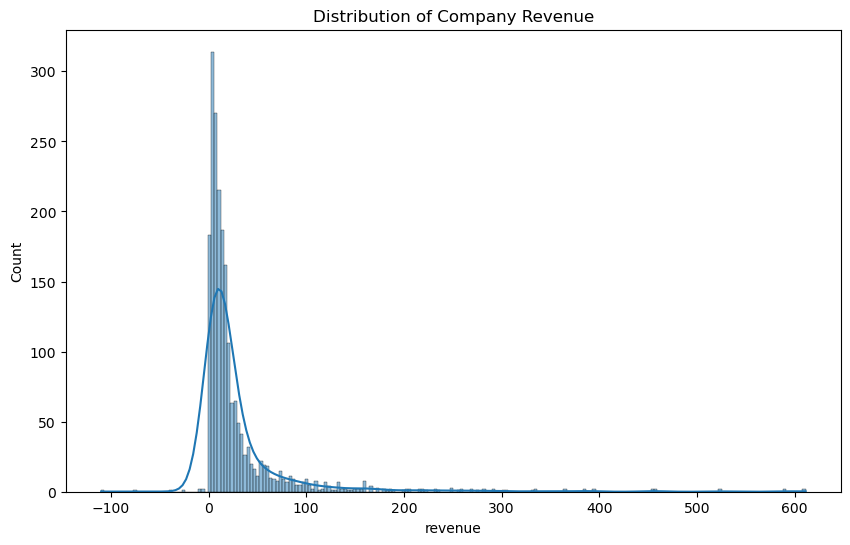

In [25]:
plt.figure(figsize = (10, 6))
sns.histplot(df['revenue'], kde= True)
plt.title('Distribution of Company Revenue')
plt.show()

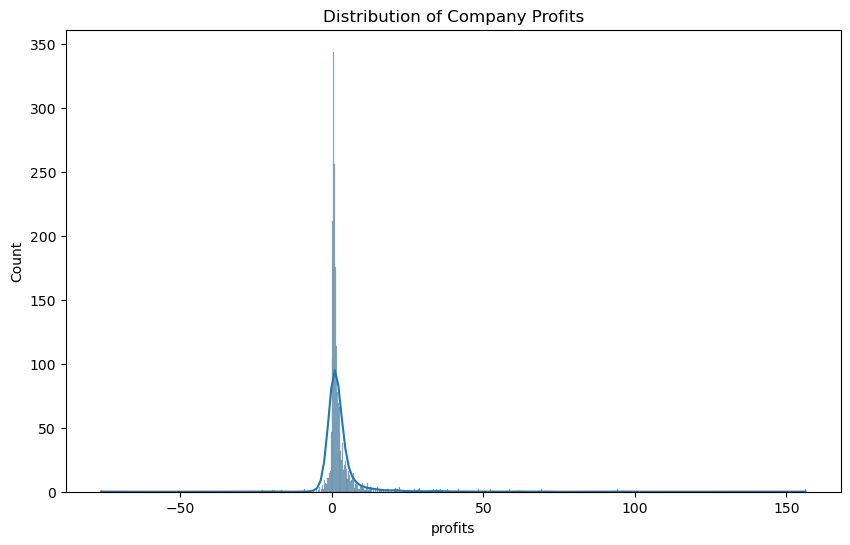

In [31]:
plt.figure(figsize = (10, 6))
sns.histplot(df['profits'], kde = True)
plt.title('Distribution of Company Profits')
plt.show()

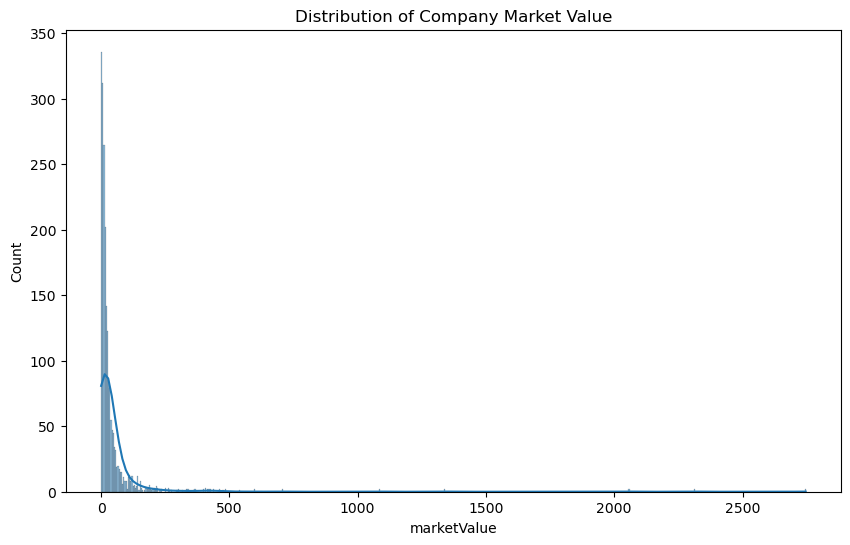

In [29]:
plt.figure(figsize = (10, 6))
sns.histplot(df['marketValue'], kde = True)
plt.title('Distribution of Company Market Value')
plt.show()

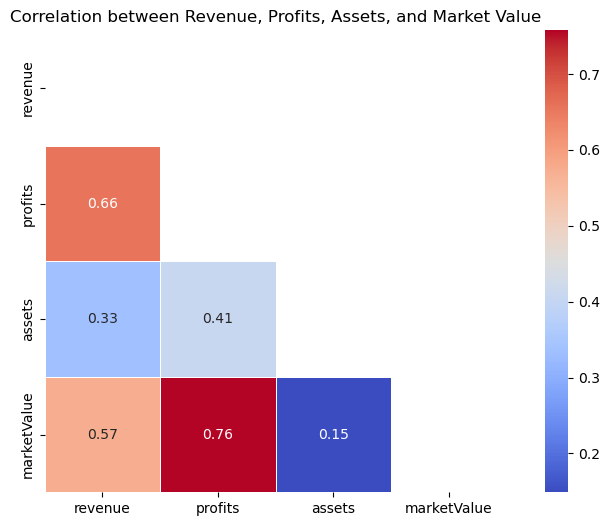

In [33]:
corr = df[['revenue', 'profits', 'assets', 'marketValue']].corr()

mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot = True, cmap ='coolwarm', mask = mask, square = True, linewidths = 0.5)
plt.title('Correlation between Revenue, Profits, Assets, and Market Value')
plt.show()

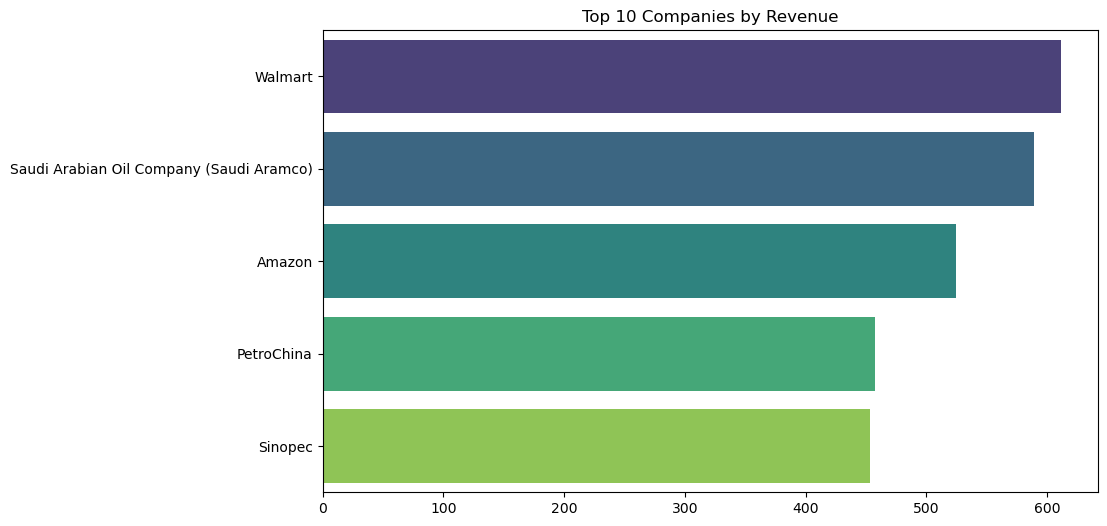

In [35]:
top_companies_by_revenue = df.sort_values(by = 'revenue', ascending = False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'revenue', y = 'organizationName', data = top_companies_by_revenue, palette = 'viridis', hue = 'organizationName', legend = False)
plt.title('Top 10 Companies by Revenue')
plt.xlabel('')
plt.ylabel('')
plt.show()

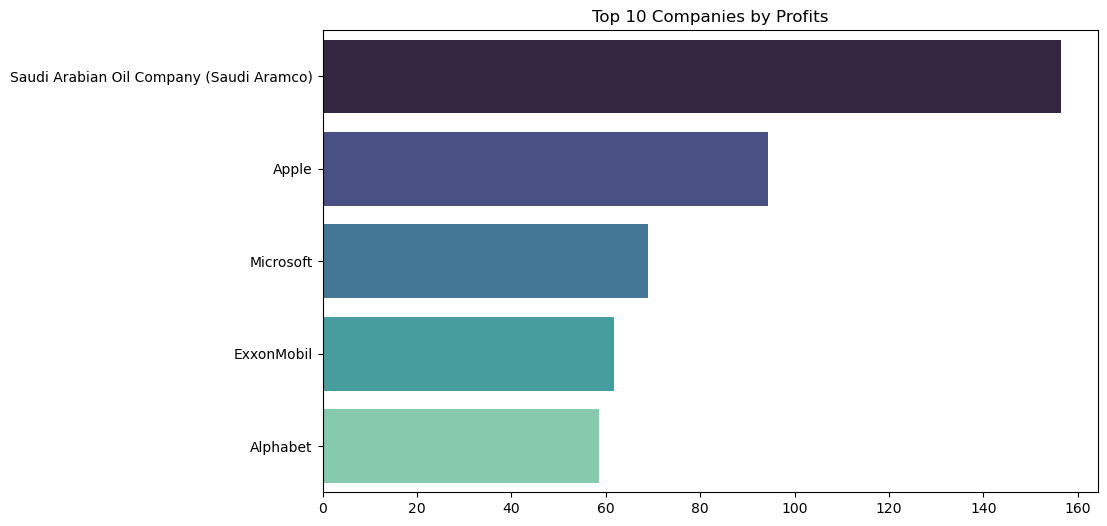

In [37]:
top_companies_by_profit = df.sort_values(by ='profits', ascending = False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot( x = 'profits', y = 'organizationName', data = top_companies_by_profit, palette = 'mako', hue = 'organizationName', legend =False)
plt.title('Top 10 Companies by Profits')
plt.xlabel('')
plt.ylabel('')
plt.show()

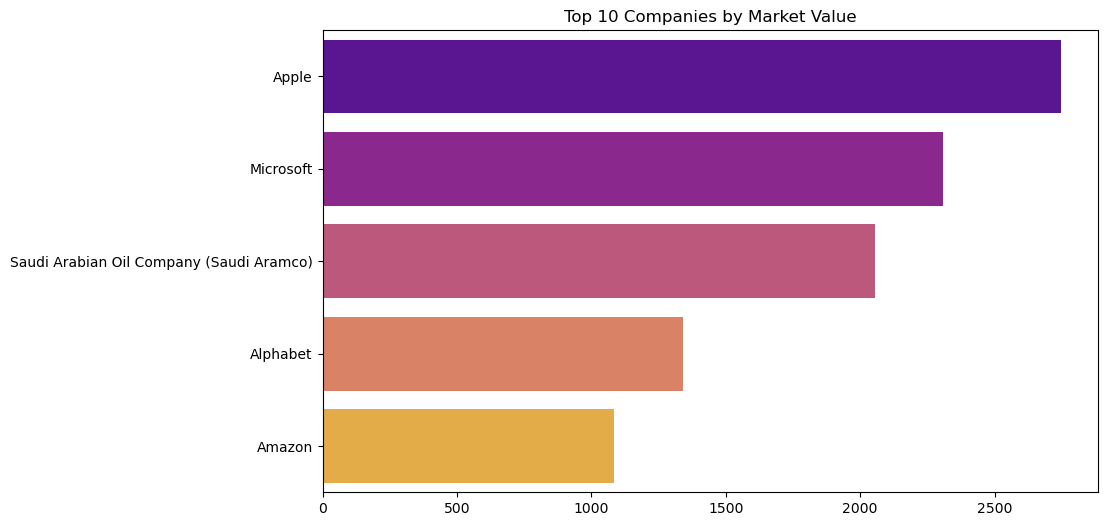

In [39]:
top_companies_by_market_value = df.sort_values(by = 'marketValue', ascending = False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'marketValue', y = 'organizationName', data = top_companies_by_market_value, palette = 'plasma', hue = 'organizationName', legend = False)
plt.title('Top 10 Companies by Market Value')
plt.xlabel('')
plt.ylabel('')
plt.show()

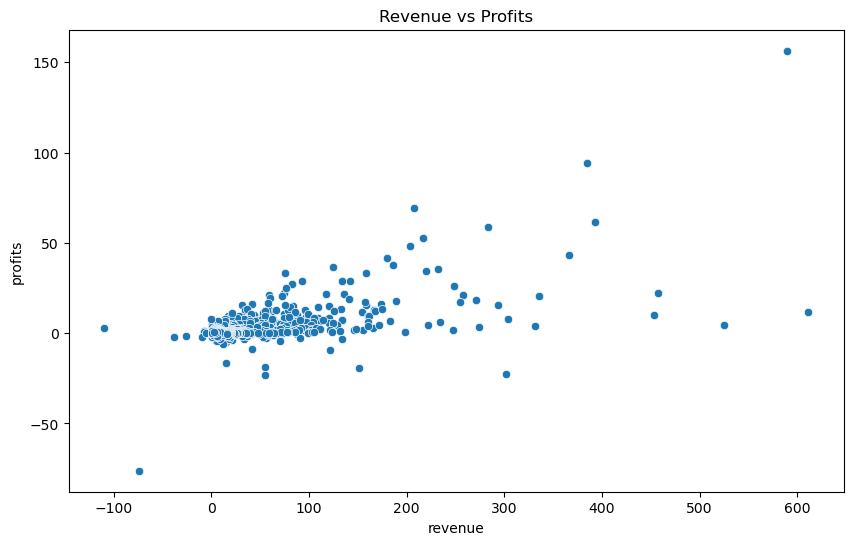

In [41]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'revenue', y = 'profits', data = df)
plt.title('Revenue vs Profits')
plt.show()

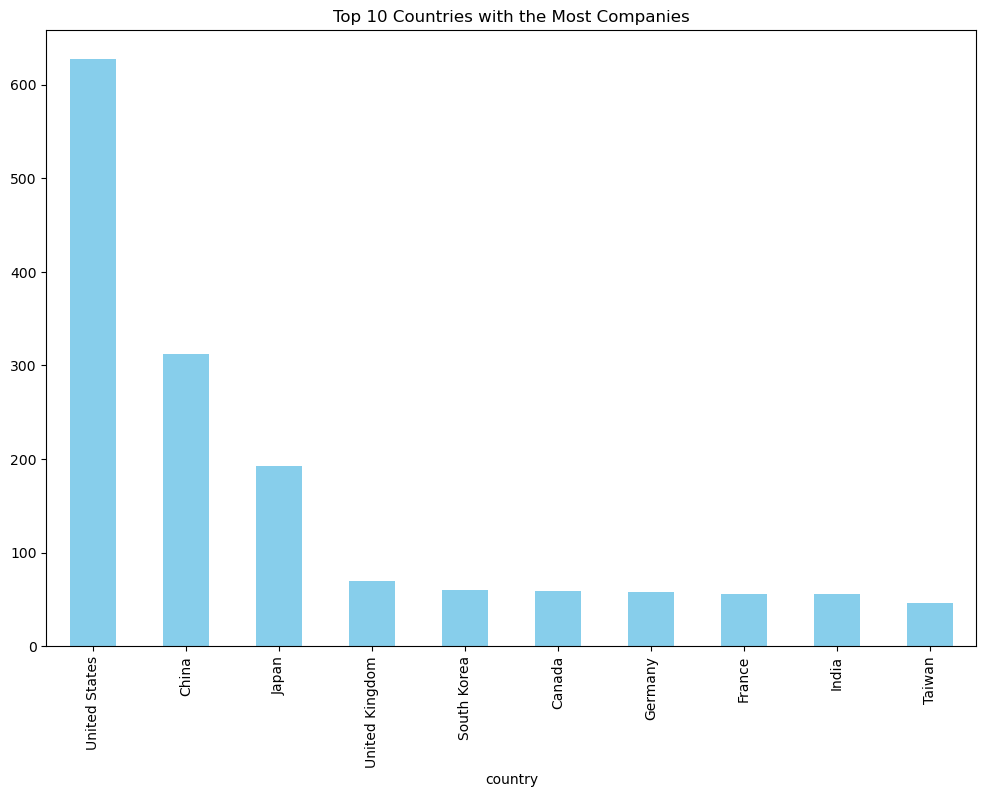

In [43]:
plt.figure(figsize = (12, 8))
df['country'].value_counts().head(10).plot(kind='bar', color = 'skyblue')
plt.title('Top 10 Countries with the Most Companies')
plt.show()

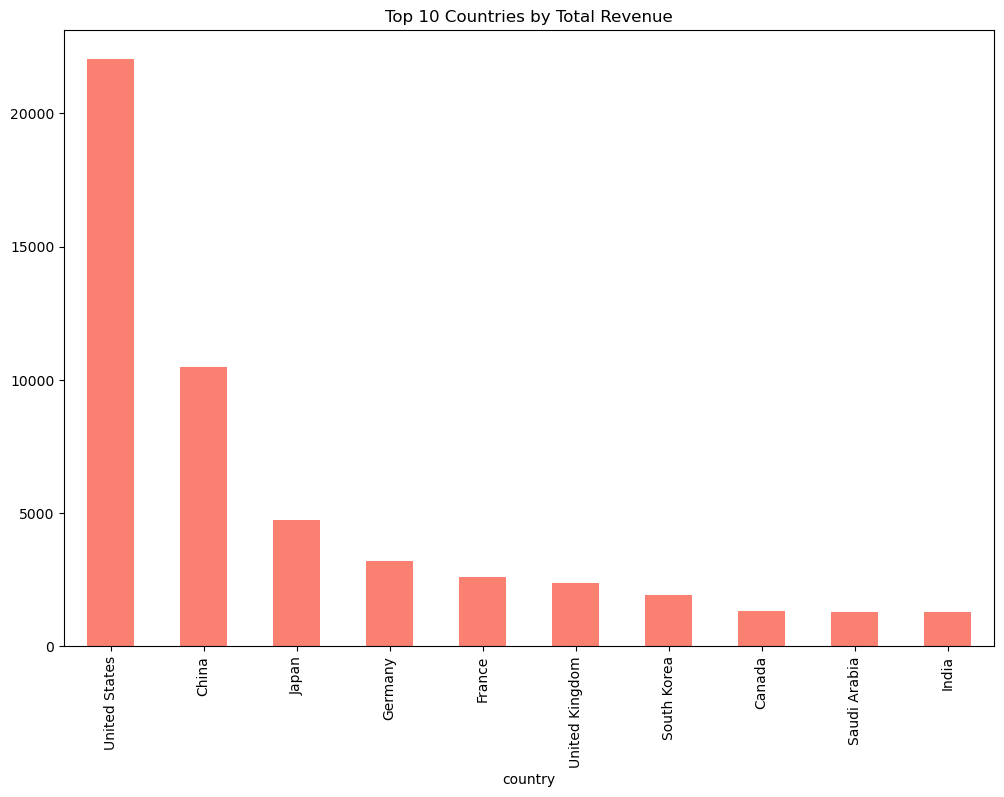

In [45]:
revenue_by_country = df.groupby('country')['revenue'].sum().sort_values(ascending = False).head(10)
plt.figure(figsize = (12, 8))
revenue_by_country.plot(kind = 'bar', color = 'salmon')
plt.title('Top 10 Countries by Total Revenue')
plt.show()

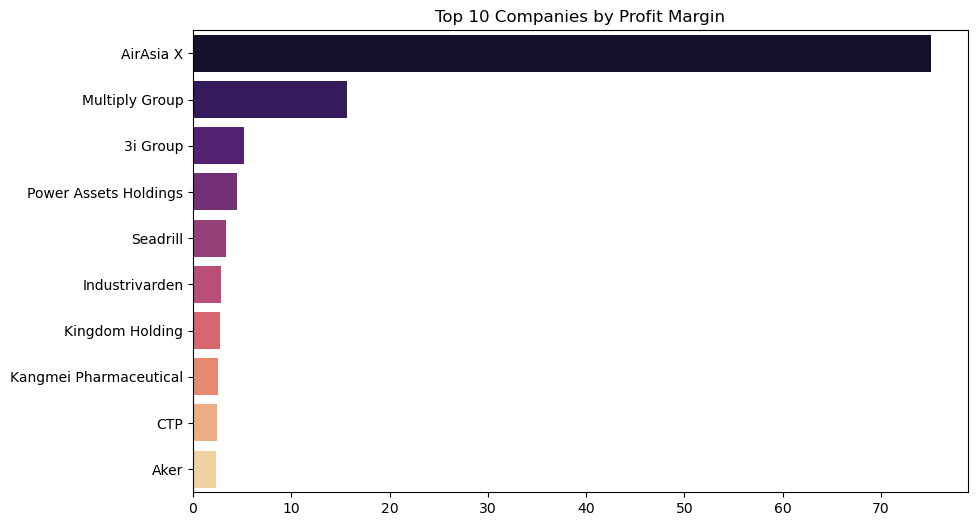

In [49]:
df['profit_margin'] = df['profits'] / df['revenue']

top_by_profit_margin = df.sort_values(by = 'profit_margin', ascending = False).head(10)

plt.figure(figsize = (10,6))
sns.barplot(x = 'profit_margin', y = 'organizationName', data = top_by_profit_margin, palette = 'magma', hue = 'organizationName', legend = False)
plt.title('Top 10 Companies by Profit Margin')
plt.xlabel('')
plt.ylabel('')
plt.show()

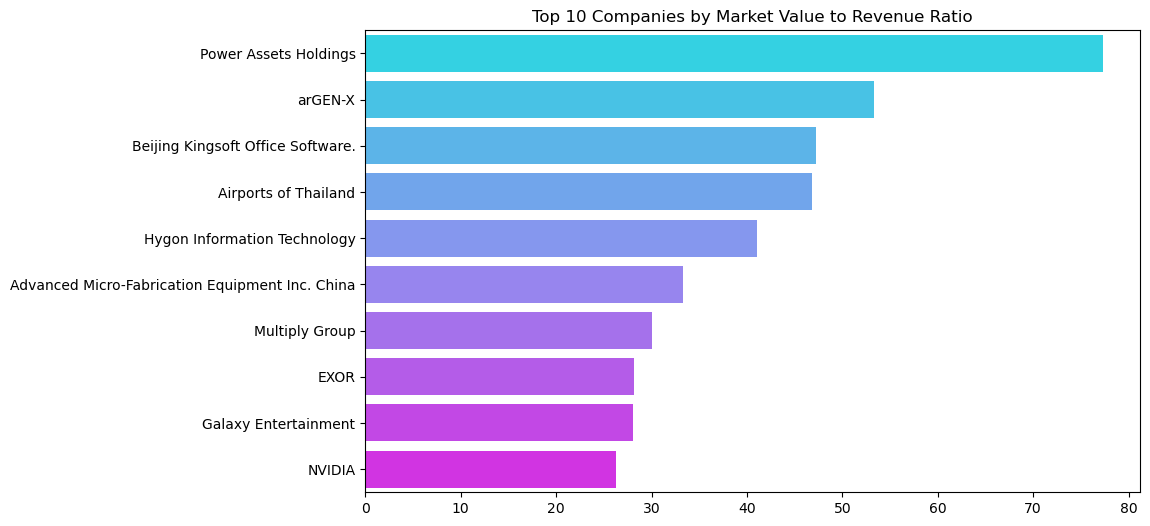

In [51]:
df['mv_to_revenue'] = df['marketValue'] / df['revenue']

top_by_mv_to_revenue = df.sort_values(by = 'mv_to_revenue', ascending = False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot( x ='mv_to_revenue', y = 'organizationName', data = top_by_mv_to_revenue, palette = 'cool', hue = 'organizationName', legend = False)
plt.title('Top 10 Companies by Market Value to Revenue Ratio')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [53]:
country_group = df.groupby('country').agg({
    'revenue' : ['sum', 'mean'],
    'profits' : ['sum', 'mean'],
    'marketValue': ['sum', 'mean']
})

country_group.columns = ['Total Revenue', 'Avg Revenue', 'Total Profits', 'Average Profits', 'Total Market Value', 'Avg market Value']
country_group.sort_values(by = 'Total Revenue', ascending = False).head(10)

,Total Revenue,Avg Revenue,Total Profits,Average Profits,Total Market Value,Avg market Value
country,,,,,,
United States,22028.473,35.133131,2220.3355,3.541205,48649.248,77.590507
China,10478.108,33.583679,902.0470,2.891176,8453.862,27.095712
Japan,4724.744,24.480539,267.2487,1.384708,3703.902,19.191202
Germany,3190.200,55.003448,175.8686,3.032217,2168.610,37.389828
France,2586.350,46.184821,152.7806,2.728225,3495.342,62.416821
United Kingdom,2372.115,33.887357,306.5081,4.378687,3053.774,43.625343
South Korea,1932.860,32.214333,117.1165,1.951942,1210.131,20.168850
Canada,1307.640,22.163390,151.7586,2.572180,2133.420,36.159661
Saudi Arabia,1291.882,71.771222,341.5799,18.976661,4560.370,253.353889
